In [1]:
import pandas as pd

In [2]:
bench = pd.read_csv("bench.csv")

In [3]:
bench

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,Per Result
0,CoordinatesBench<float>/CalcBondsFloat/10/0/0,22391822,2.916740e+01,2.915750e+01,ns,NaN,3.429650e+08,NaN,NaN,NaN,2.915750e-09
1,CoordinatesBench<float>/CalcBondsFloat/100/0/0,23911617,2.929920e+01,2.928920e+01,ns,NaN,3.414230e+09,NaN,NaN,NaN,2.928920e-10
2,CoordinatesBench<float>/CalcBondsFloat/1000/0/0,2503365,2.794400e+02,2.793420e+02,ns,NaN,3.579840e+09,NaN,NaN,NaN,2.793420e-10
3,CoordinatesBench<float>/CalcBondsFloat/10000/0/0,267236,2.670340e+03,2.669420e+03,ns,NaN,3.746130e+09,NaN,NaN,NaN,2.669420e-10
4,CoordinatesBench<float>/CalcBondsFloat/100000/0/0,26212,2.709570e+04,2.708640e+04,ns,NaN,3.691890e+09,NaN,NaN,NaN,2.708640e-10
...,...,...,...,...,...,...,...,...,...,...,...
107,CoordinatesBench<double>/CalcBondsMDATriclinic...,29587,2.366340e+04,2.365570e+04,ns,NaN,4.227310e+07,NaN,NaN,NaN,2.365570e-08
108,CoordinatesBench<double>/CalcBondsMDATriclinic...,2777,2.439500e+05,2.438350e+05,ns,NaN,4.101140e+07,NaN,NaN,NaN,2.438350e-08
109,CoordinatesBench<double>/CalcBondsMDATriclinic...,139,4.955870e+06,4.954180e+06,ns,NaN,2.018500e+07,NaN,NaN,NaN,4.954180e-08
110,CoordinatesBench<double>/CalcBondsMDATriclinic...,12,5.052080e+07,5.050610e+07,ns,NaN,1.979960e+07,NaN,NaN,NaN,5.050610e-08


In [4]:
# convert real_time and cpu_time to ms
bench["real_time"] = bench["real_time"]*1e-6
bench["cpu_time"] = bench["real_time"]*1e-6

In [5]:
bench["size"] = bench["name"].apply(lambda x: int(x.split("/")[2]))

In [6]:
bench["prec"] = bench["name"].apply(lambda x: "float" if "float"  in x else "double")

In [7]:
bench["tag"] =  bench["name"].apply(lambda x: x.split("/")[1])

In [8]:
bench["engine"] =  bench["name"].apply(lambda x: "mda" if "mda" in x.lower() else "distopia")

In [9]:
bench["n_dist"] =  bench["iterations"]*bench["size"]

In [10]:
bench["single_iter_time"] =  bench["real_time"] / bench["iterations"]

In [11]:
def get_box(s):
    s_l = s.lower()
    if "ortho" in s_l:
        return "ortho"
    elif "triclinic" in s_l:
        return "triclinic"
    else:
        return "no_box"

In [12]:
bench["box"] = bench["name"].apply(lambda x: get_box(x))

In [13]:
bench

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,Per Result,size,prec,tag,engine,n_dist,single_iter_time,box
0,CoordinatesBench<float>/CalcBondsFloat/10/0/0,22391822,0.000029,2.916740e-11,ns,NaN,3.429650e+08,NaN,NaN,NaN,2.915750e-09,10,float,CalcBondsFloat,distopia,223918220,1.302592e-12,no_box
1,CoordinatesBench<float>/CalcBondsFloat/100/0/0,23911617,0.000029,2.929920e-11,ns,NaN,3.414230e+09,NaN,NaN,NaN,2.928920e-10,100,float,CalcBondsFloat,distopia,2391161700,1.225312e-12,no_box
2,CoordinatesBench<float>/CalcBondsFloat/1000/0/0,2503365,0.000279,2.794400e-10,ns,NaN,3.579840e+09,NaN,NaN,NaN,2.793420e-10,1000,float,CalcBondsFloat,distopia,2503365000,1.116258e-10,no_box
3,CoordinatesBench<float>/CalcBondsFloat/10000/0/0,267236,0.002670,2.670340e-09,ns,NaN,3.746130e+09,NaN,NaN,NaN,2.669420e-10,10000,float,CalcBondsFloat,distopia,2672360000,9.992441e-09,no_box
4,CoordinatesBench<float>/CalcBondsFloat/100000/0/0,26212,0.027096,2.709570e-08,ns,NaN,3.691890e+09,NaN,NaN,NaN,2.708640e-10,100000,float,CalcBondsFloat,distopia,2621200000,1.033714e-06,no_box
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,CoordinatesBench<double>/CalcBondsMDATriclinic...,29587,0.023663,2.366340e-08,ns,NaN,4.227310e+07,NaN,NaN,NaN,2.365570e-08,1000,double,CalcBondsMDATriclinicOutBoxDouble,mda,29587000,7.997904e-07,triclinic
108,CoordinatesBench<double>/CalcBondsMDATriclinic...,2777,0.243950,2.439500e-07,ns,NaN,4.101140e+07,NaN,NaN,NaN,2.438350e-08,10000,double,CalcBondsMDATriclinicOutBoxDouble,mda,27770000,8.784660e-05,triclinic
109,CoordinatesBench<double>/CalcBondsMDATriclinic...,139,4.955870,4.955870e-06,ns,NaN,2.018500e+07,NaN,NaN,NaN,4.954180e-08,100000,double,CalcBondsMDATriclinicOutBoxDouble,mda,13900000,3.565374e-02,triclinic
110,CoordinatesBench<double>/CalcBondsMDATriclinic...,12,50.520800,5.052080e-05,ns,NaN,1.979960e+07,NaN,NaN,NaN,5.050610e-08,1000000,double,CalcBondsMDATriclinicOutBoxDouble,mda,12000000,4.210067e+00,triclinic


In [14]:
bench["condition"] = bench["prec"] + "_" + bench["box"]

In [15]:
bench

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,Per Result,size,prec,tag,engine,n_dist,single_iter_time,box,condition
0,CoordinatesBench<float>/CalcBondsFloat/10/0/0,22391822,0.000029,2.916740e-11,ns,NaN,3.429650e+08,NaN,NaN,NaN,2.915750e-09,10,float,CalcBondsFloat,distopia,223918220,1.302592e-12,no_box,float_no_box
1,CoordinatesBench<float>/CalcBondsFloat/100/0/0,23911617,0.000029,2.929920e-11,ns,NaN,3.414230e+09,NaN,NaN,NaN,2.928920e-10,100,float,CalcBondsFloat,distopia,2391161700,1.225312e-12,no_box,float_no_box
2,CoordinatesBench<float>/CalcBondsFloat/1000/0/0,2503365,0.000279,2.794400e-10,ns,NaN,3.579840e+09,NaN,NaN,NaN,2.793420e-10,1000,float,CalcBondsFloat,distopia,2503365000,1.116258e-10,no_box,float_no_box
3,CoordinatesBench<float>/CalcBondsFloat/10000/0/0,267236,0.002670,2.670340e-09,ns,NaN,3.746130e+09,NaN,NaN,NaN,2.669420e-10,10000,float,CalcBondsFloat,distopia,2672360000,9.992441e-09,no_box,float_no_box
4,CoordinatesBench<float>/CalcBondsFloat/100000/0/0,26212,0.027096,2.709570e-08,ns,NaN,3.691890e+09,NaN,NaN,NaN,2.708640e-10,100000,float,CalcBondsFloat,distopia,2621200000,1.033714e-06,no_box,float_no_box
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,CoordinatesBench<double>/CalcBondsMDATriclinic...,29587,0.023663,2.366340e-08,ns,NaN,4.227310e+07,NaN,NaN,NaN,2.365570e-08,1000,double,CalcBondsMDATriclinicOutBoxDouble,mda,29587000,7.997904e-07,triclinic,double_triclinic
108,CoordinatesBench<double>/CalcBondsMDATriclinic...,2777,0.243950,2.439500e-07,ns,NaN,4.101140e+07,NaN,NaN,NaN,2.438350e-08,10000,double,CalcBondsMDATriclinicOutBoxDouble,mda,27770000,8.784660e-05,triclinic,double_triclinic
109,CoordinatesBench<double>/CalcBondsMDATriclinic...,139,4.955870,4.955870e-06,ns,NaN,2.018500e+07,NaN,NaN,NaN,4.954180e-08,100000,double,CalcBondsMDATriclinicOutBoxDouble,mda,13900000,3.565374e-02,triclinic,double_triclinic
110,CoordinatesBench<double>/CalcBondsMDATriclinic...,12,50.520800,5.052080e-05,ns,NaN,1.979960e+07,NaN,NaN,NaN,5.050610e-08,1000000,double,CalcBondsMDATriclinicOutBoxDouble,mda,12000000,4.210067e+00,triclinic,double_triclinic


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
calcbonds_no_box = bench.query("tag == 'CalcBondsFloat' or tag == 'CalcBondsDouble' or tag == 'CalcBondsMDAFloat' or tag == 'CalcBondsMDADouble'")

(0.0, 5000000000.0)

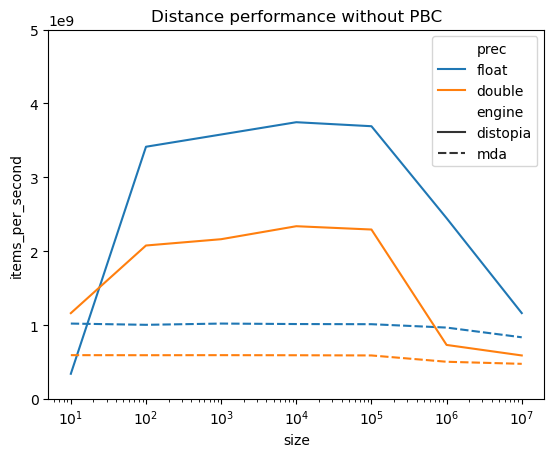

In [18]:
plt.title("Distance performance without PBC")

sns.lineplot(data=calcbonds_no_box, x="size", y="items_per_second", hue="prec", style="engine")
plt.xscale("log")
plt.ylim(0, 5e9)

In [19]:
calcbonds_ortho = bench.query("tag == 'CalcBondsOrthoOutBoxFloat' or tag == 'CalcBondsOrthoOutBoxDouble' or tag == 'CalcBondsMDAOrthoOutBoxFloat' or tag == 'CalcBondsMDAOrthoOutBoxDouble'")

(0.0, 5000000000.0)

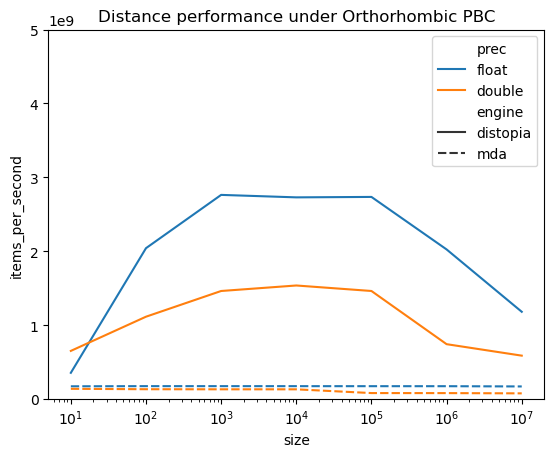

In [20]:
plt.title("Distance performance under Orthorhombic PBC")
sns.lineplot(data=calcbonds_ortho, x="size", y="items_per_second", hue="prec", style="engine")
plt.xscale("log")
plt.ylim(0, 5e9)

In [21]:
calcbonds_tric = bench.query("tag == 'CalcBondsTriclinicOutBoxFloat' or tag == 'CalcBondsTriclinicOutBoxDouble' or tag == 'CalcBondsMDATriclinicOutBoxFloat' or tag == 'CalcBondsMDATriclinicOutBoxDouble'")

(0.0, 5000000000.0)

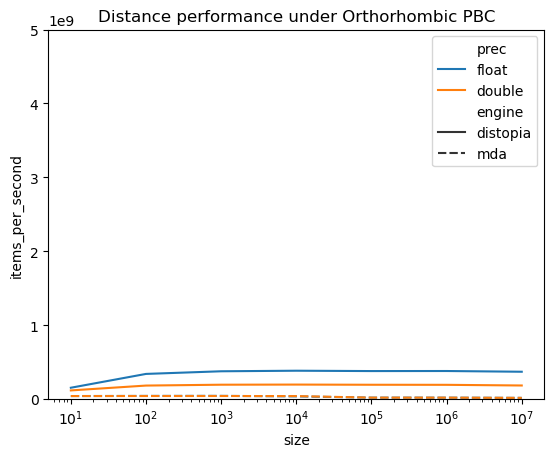

In [22]:
plt.title("Distance performance under Orthorhombic PBC")
sns.lineplot(data=calcbonds_tric, x="size", y="items_per_second", hue="prec", style="engine")
plt.xscale("log")
plt.ylim(0, 5e9)

In [23]:
no_inbox = bench.query("'InBox' not in name")

In [24]:
no_inbox

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,Per Result,size,prec,tag,engine,n_dist,single_iter_time,box,condition
0,CoordinatesBench<float>/CalcBondsFloat/10/0/0,22391822,0.000029,2.916740e-11,ns,NaN,3.429650e+08,NaN,NaN,NaN,2.915750e-09,10,float,CalcBondsFloat,distopia,223918220,1.302592e-12,no_box,float_no_box
1,CoordinatesBench<float>/CalcBondsFloat/100/0/0,23911617,0.000029,2.929920e-11,ns,NaN,3.414230e+09,NaN,NaN,NaN,2.928920e-10,100,float,CalcBondsFloat,distopia,2391161700,1.225312e-12,no_box,float_no_box
2,CoordinatesBench<float>/CalcBondsFloat/1000/0/0,2503365,0.000279,2.794400e-10,ns,NaN,3.579840e+09,NaN,NaN,NaN,2.793420e-10,1000,float,CalcBondsFloat,distopia,2503365000,1.116258e-10,no_box,float_no_box
3,CoordinatesBench<float>/CalcBondsFloat/10000/0/0,267236,0.002670,2.670340e-09,ns,NaN,3.746130e+09,NaN,NaN,NaN,2.669420e-10,10000,float,CalcBondsFloat,distopia,2672360000,9.992441e-09,no_box,float_no_box
4,CoordinatesBench<float>/CalcBondsFloat/100000/0/0,26212,0.027096,2.709570e-08,ns,NaN,3.691890e+09,NaN,NaN,NaN,2.708640e-10,100000,float,CalcBondsFloat,distopia,2621200000,1.033714e-06,no_box,float_no_box
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,CoordinatesBench<double>/CalcBondsMDATriclinic...,29587,0.023663,2.366340e-08,ns,NaN,4.227310e+07,NaN,NaN,NaN,2.365570e-08,1000,double,CalcBondsMDATriclinicOutBoxDouble,mda,29587000,7.997904e-07,triclinic,double_triclinic
108,CoordinatesBench<double>/CalcBondsMDATriclinic...,2777,0.243950,2.439500e-07,ns,NaN,4.101140e+07,NaN,NaN,NaN,2.438350e-08,10000,double,CalcBondsMDATriclinicOutBoxDouble,mda,27770000,8.784660e-05,triclinic,double_triclinic
109,CoordinatesBench<double>/CalcBondsMDATriclinic...,139,4.955870,4.955870e-06,ns,NaN,2.018500e+07,NaN,NaN,NaN,4.954180e-08,100000,double,CalcBondsMDATriclinicOutBoxDouble,mda,13900000,3.565374e-02,triclinic,double_triclinic
110,CoordinatesBench<double>/CalcBondsMDATriclinic...,12,50.520800,5.052080e-05,ns,NaN,1.979960e+07,NaN,NaN,NaN,5.050610e-08,1000000,double,CalcBondsMDATriclinicOutBoxDouble,mda,12000000,4.210067e+00,triclinic,double_triclinic


(0.0, 5000000000.0)

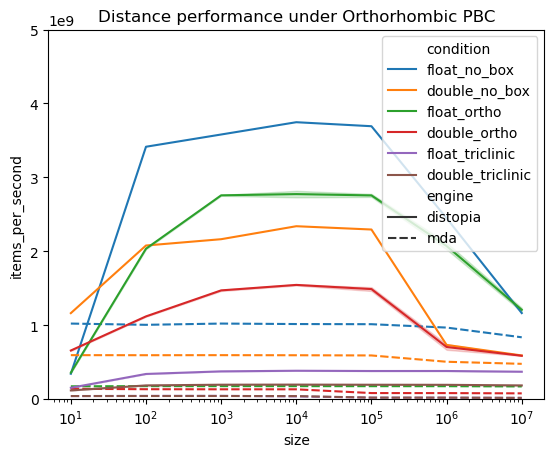

In [25]:
plt.title("Distance performance under Orthorhombic PBC")
sns.lineplot(data=no_inbox, x="size", y="items_per_second", hue="condition", style="engine")
plt.xscale("log")
plt.ylim(0, 5e9)

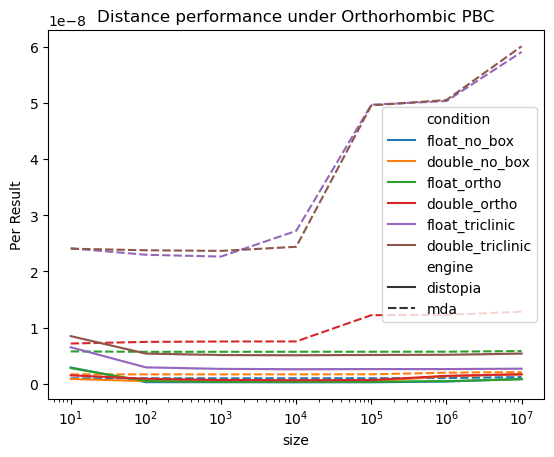

In [26]:
plt.title("Distance performance under Orthorhombic PBC")
sns.lineplot(data=no_inbox, x="size", y="Per Result", hue="condition", style="engine")
plt.xscale("log")


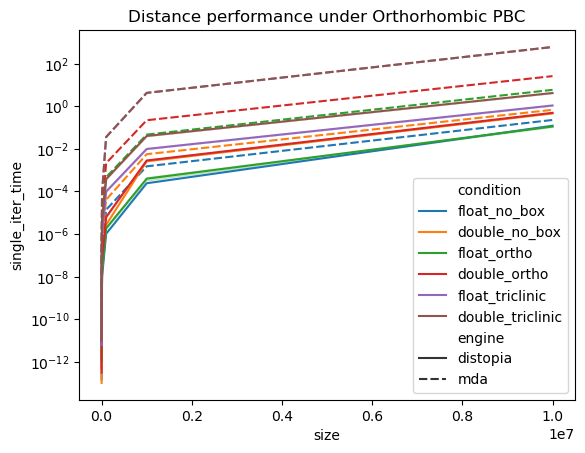

In [27]:
plt.title("Distance performance under Orthorhombic PBC")
sns.lineplot(data=no_inbox, x="size", y="single_iter_time", hue="condition", style="engine")
plt.yscale("log")

Text(0, 0.5, 'time (ms)')

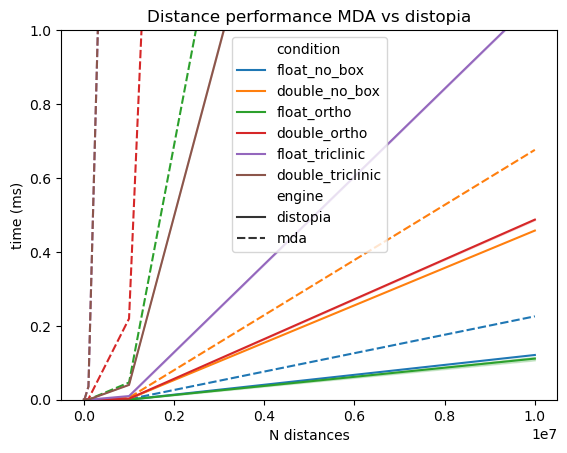

In [36]:
plt.title("Distance performance MDA vs distopia")
sns.lineplot(data=no_inbox, x="size", y="single_iter_time", hue="condition", style="engine")
plt.ylim(0, 1)
plt.xlabel("N distances")
plt.ylabel("time (ms)")

(1e-07, 1000.0)

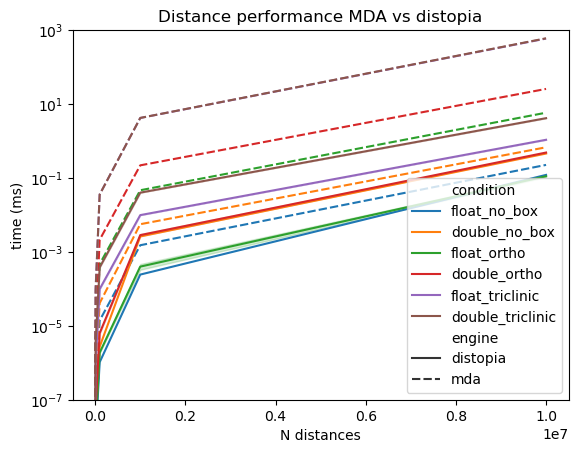

In [40]:
plt.title("Distance performance MDA vs distopia")
sns.lineplot(data=no_inbox, x="size", y="single_iter_time", hue="condition", style="engine")
plt.yscale("log")
plt.xlabel("N distances")
plt.ylabel("time (ms)")
plt.ylim(10e-8, 10e2)

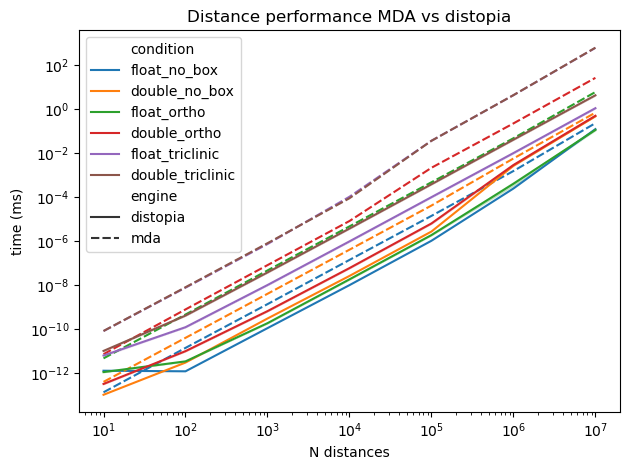

In [44]:
plt.title("Distance performance MDA vs distopia")
sns.lineplot(data=no_inbox, x="size", y="single_iter_time", hue="condition", style="engine")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("N distances")
plt.ylabel("time (ms)")
plt.tight_layout()
plt.savefig("log_log.png")